In [4]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# read the dataset yearly first

yearly_data = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

yearly_data

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [11]:
# Some basic analysis to check for empty rows, check the names of columns

yearly_data.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [8]:
yearly_data.shape

(12, 4)

In [10]:
yearly_data.isnull().sum()

year      0
births    0
deaths    0
clinic    0
dtype: int64

In [21]:
# No empty row values. Sane data :)
# Final check to validate the date - shouldn't be after 2020 (current date of creation of this project)

max_year = yearly_data['year'].max()
min_year = yearly_data['year'].min()


In [33]:
# Creating datasets for both clinics - 1,2

yearly_clinic1_data = yearly_data[yearly_data['clinic'] == 'clinic 1'].copy()
yearly_clinic2_data = yearly_data[yearly_data['clinic'] == 'clinic 2'].copy()

yearly_clinic1_data

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1


In [37]:
# What is the proportion of deaths in clinic 1 for the different years

yearly_clinic1_data['proportion_deaths'] = round((yearly_clinic1_data['deaths'] / yearly_clinic1_data['births']) * 100, 2)

yearly_clinic1_data

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90
5,1846,4010,459,clinic 1,11.45


In [38]:
# What is the proportion of deaths in clinic 2 for the different years

yearly_clinic2_data['proportion_deaths'] = round((yearly_clinic2_data['deaths'] / yearly_clinic2_data['births']) * 100, 2)

yearly_clinic2_data

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,3.52
7,1842,2659,202,clinic 2,7.60
8,1843,2739,164,clinic 2,5.99
9,1844,2956,68,clinic 2,2.30
10,1845,3241,66,clinic 2,2.04
11,1846,3754,105,clinic 2,2.80


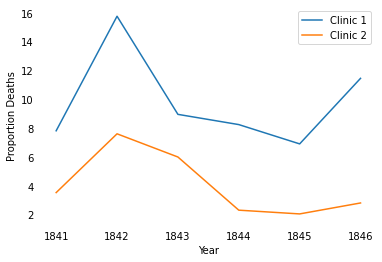

In [59]:
# Now we have the data - we can plot and see the difference pictorially

ax = yearly_clinic1_data.plot(x='year', y='proportion_deaths', label='Clinic 1')
yearly_clinic2_data.plot(x='year', y='proportion_deaths', label='Clinic 2', ax=ax)

ax.set_ylabel('Proportion Deaths')
ax.set_xlabel('Year')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [75]:
# Reading monthly data for further analysis

monthly_data_clinic1 = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

monthly_data_clinic1

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [76]:
# Running basic check - column names, number or rows and columns

monthly_data_clinic1.columns

Index(['date', 'births', 'deaths'], dtype='object')

In [77]:
monthly_data_clinic1.shape

(98, 3)

In [78]:
# Checking the maximum and minimum years

max_year_date = monthly_data_clinic1['date'].max()
max_year_date

Timestamp('1849-03-01 00:00:00')

In [79]:
min_year_date = monthly_data_clinic1['date'].min()
min_year_date

Timestamp('1841-01-01 00:00:00')

Text(0, 0.5, 'Proportion Deaths')

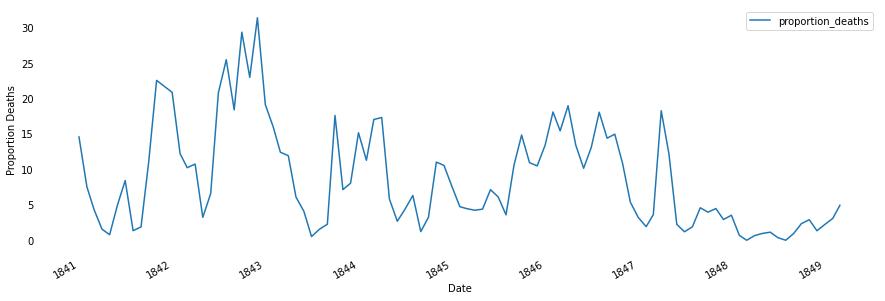

In [89]:
# Lets plot the graph and spot if there was any significant difference in proportion deaths

monthly_data_clinic1['proportion_deaths'] = round((monthly_data_clinic1['deaths'] / monthly_data_clinic1['births']) * 100, 2)

ax = monthly_data_clinic1.plot(x='date', y='proportion_deaths', figsize=(15,5))

ax.tick_params(axis='x', which='both', bottom=False)
ax.tick_params(axis='y', which='both', left=False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xlabel('Date')
ax.set_ylabel('Proportion Deaths')

Text(0, 0.5, 'Proportion Deaths')

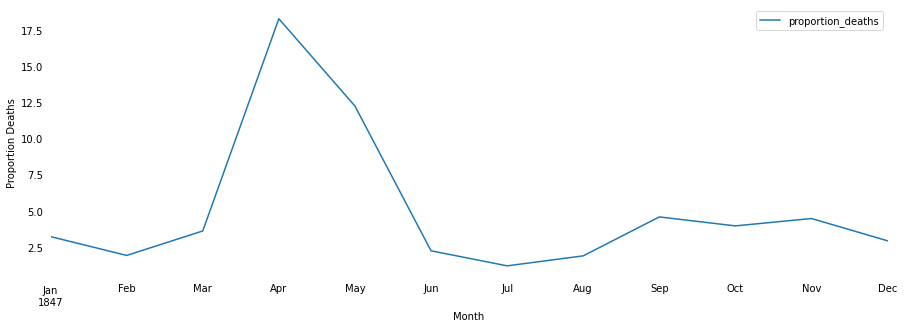

In [95]:
# From the year 1847 Proportion deaths have reduced considerably.
# Lets examine in details the year 1847

monthly_data_1847 = monthly_data_clinic1[(monthly_data_clinic1['date'] >= '1847-01-01 00:00:00') & (monthly_data_clinic1['date'] < '1848-01-01 00:00:00')]

ax = monthly_data_1847.plot(x='date', y='proportion_deaths', figsize=(15,5))

ax.tick_params(axis='x', which='both', bottom=False)
ax.tick_params(axis='y', which='both', left=False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xlabel('Month')
ax.set_ylabel('Proportion Deaths')

In [96]:
# Hence starting from the summer of 1847 the deaths reduced drastically in clinic 1 
# This is when the Handwashing was made obligatory


In [99]:
# On an average how much reduction was there in the deaths

before_handwashing = monthly_data_clinic1[monthly_data_clinic1['date'] < '1848-01-01 00:00:00']['proportion_deaths']
after_handwashing = monthly_data_clinic1[monthly_data_clinic1['date'] >= '1848-01-01 00:00:00']['proportion_deaths']

mean_difference = after_handwashing.mean() - before_handwashing.mean()

mean_difference

-8.199726907630527

In [100]:
# Hence the reduction is 8% - a huge number reduction
# To get a feeling for the uncertainty around how much handwashing reduces mortalities 
# we could look at a confidence interval (here calculated using the bootstrap method)

from numpy import percentile

boot_mean_diff = []

for i in range(3000):
    before_proportion = before_handwashing.sample(frac=1, replace=True)
    after_proportion = after_handwashing.sample(frac=1, replace=True)
    boot_mean_diff.append(after_proportion.mean() - before_proportion.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = percentile(boot_mean_diff, [2.5, 97.5])
print(confidence_interval)

[-9.8677741  -6.56696667]


In [101]:
# Hence the confidence interval shows that proportion deaths reduced by 6 - 10 percent points

The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as bacteria) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.

One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.

"Hence Doctors should wash their hands!"
"Infact keeping Covid-19, it is healthy if we all wash our hands between certain intervals of time"

"Good Luck! :)"